## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as plty
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


## Import the dataset

In [2]:
path="Customer Churn Data.xlsx"
names = ['AccountID', 'Churn','Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender', 'Service_Score', 'Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']
df = pd.read_excel(path, names = names,sheet_name='Data for DSBA')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [3]:
df.isna().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

## Preprocessing

In [4]:
df.account_segment.value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

As we can see bove that Regular Plus and Regular + have same meaning, We'll replace Regular Plus with Regular + and same for all others

In [5]:
df['account_segment']=df['account_segment'].replace('Regular +','Regular Plus')
df['account_segment']=df['account_segment'].replace('Super +','Super Plus')
df.account_segment.value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [6]:
df.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [7]:
df['Gender']=df['Gender'].replace('M','Male')
df['Gender']=df['Gender'].replace('F','Female')

<AxesSubplot:xlabel='Churn', ylabel='count'>

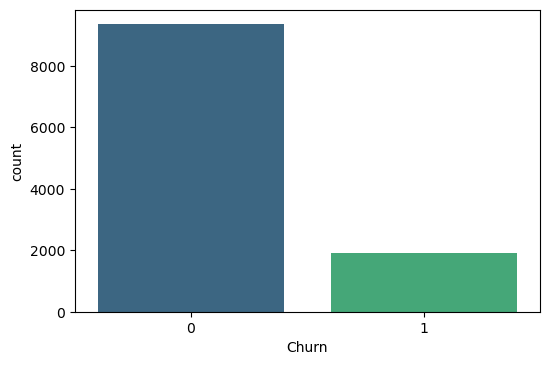

In [8]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=df,x='Churn',palette='viridis')

In [9]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [10]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0]==2:
        binary_cols.append(col)

In [11]:
binary_cols

['Churn', 'Gender', 'Complain_ly']

In [12]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [13]:
df.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [14]:
df['rev_per_month']=df['rev_per_month'].replace('+','')
df['rev_per_month']=pd.to_numeric(df['rev_per_month'])
df['rev_per_month']=df['rev_per_month'].replace('',df['rev_per_month'].mean())

In [15]:
df.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [16]:
df['Tenure']=df['Tenure'].replace('#','')
df['Tenure']=pd.to_numeric(df['Tenure'])
df['Tenure']=df['Tenure'].replace('',df['Tenure'].mean())

In [17]:
df.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [18]:
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].replace('$','')
df['Day_Since_CC_connect']=pd.to_numeric(df['Day_Since_CC_connect'])
df['Day_Since_CC_connect']=df['Day_Since_CC_connect'].replace('',df['Day_Since_CC_connect'].mean())

In [19]:
df.Account_user_count.unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [20]:
df['Account_user_count']=df['Account_user_count'].replace('@','')
df['Account_user_count']=pd.to_numeric(df['Account_user_count'])
df['Account_user_count']=df['Account_user_count'].replace('',df['Account_user_count'].mean())

In [21]:
df.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [22]:
df['rev_growth_yoy']=df['rev_growth_yoy'].replace('$','')
df['rev_growth_yoy']=pd.to_numeric(df['rev_growth_yoy'])
df['rev_growth_yoy']=df['rev_growth_yoy'].replace('',df['rev_growth_yoy'].mean())

In [23]:
df.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [24]:
df['cashback']=df['cashback'].replace('$','')
df['cashback']=pd.to_numeric(df['cashback'])
df['cashback']=df['cashback'].replace('',df['cashback'].mean())

In [25]:
df.Login_device.unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [26]:
df['Login_device']=df['Login_device'].replace('&&&&','Tab')
df['Login_device']=df['Login_device'].replace('','Tab')

In [27]:
df.coupon_used_for_payment.unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [28]:
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('$','')
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('#','')
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('*','')
df['coupon_used_for_payment']=pd.to_numeric(df['coupon_used_for_payment'])
df['coupon_used_for_payment']=df['coupon_used_for_payment'].replace('',df['coupon_used_for_payment'].mean())

In [29]:
df.dtypes

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

### Bivariate

C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

<AxesSubplot:xlabel='Login_device', ylabel='count'>

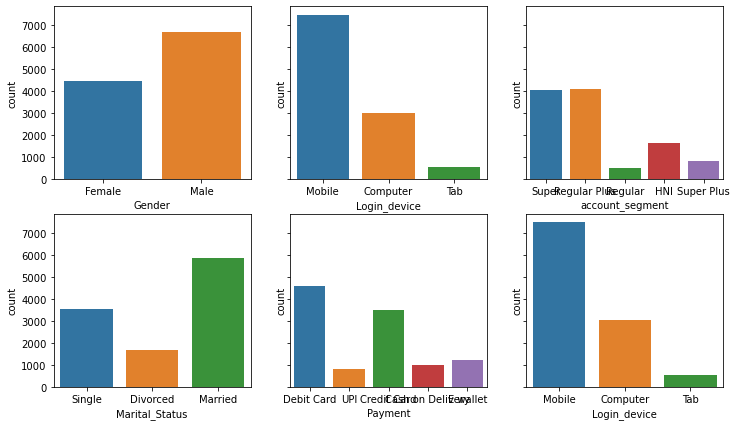

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("Gender", data=df, ax=axes[0,0])
sns.countplot("Login_device", data=df, ax=axes[0,1])
sns.countplot("account_segment", data=df, ax=axes[0,2])
sns.countplot("Marital_Status", data=df, ax=axes[1,0])
sns.countplot("Payment", data=df, ax=axes[1,1])
sns.countplot("Login_device", data=df, ax=axes[1,2])


In [31]:
Payment_split = df[[ "AccountID", "Payment"]]
pmt = Payment_split .groupby ("Payment")
Payment_split= pd.DataFrame(pmt["AccountID"].count())
Payment_split.rename(columns={'AccountID':'No. of customers'}, inplace=True)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

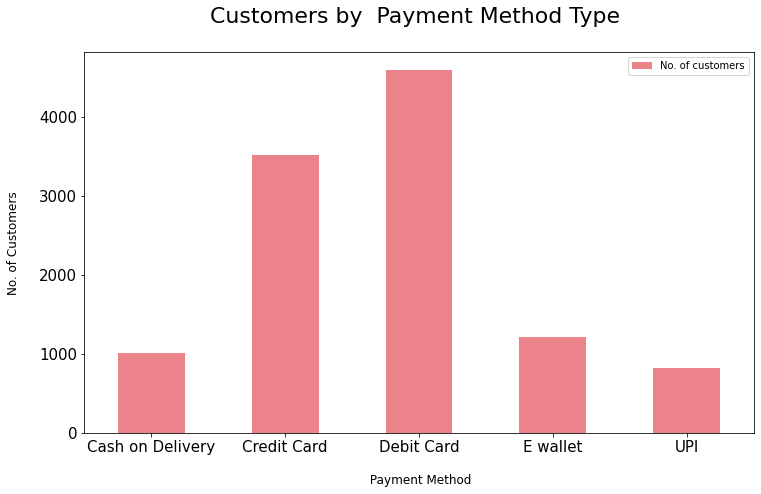

In [32]:
ax =  Payment_split[["No. of customers"]].plot.bar(title = 'Customers by Payment Method',legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by  Payment Method Type \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

In [33]:
df[['Gender','Churn']].groupby(['Gender']).mean()

,Churn
Gender,
Female,0.154901
Male,0.176760


In [34]:
correlations = df.corr()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

## Correlation Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

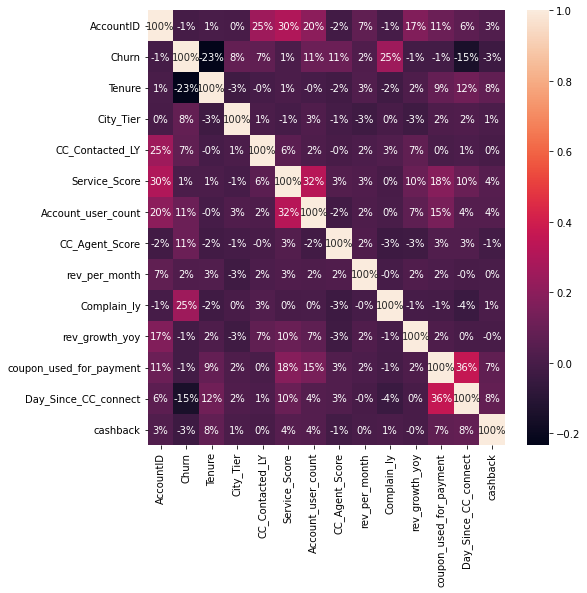

In [36]:
#correlation visualization
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, fmt = '0.0%')
plt.show

In [37]:
df.isna().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

In [38]:
df.drop_duplicates(keep=False, inplace=True)

In [39]:
df.shape

(11260, 19)

### Null Values Heatmap

<AxesSubplot:>

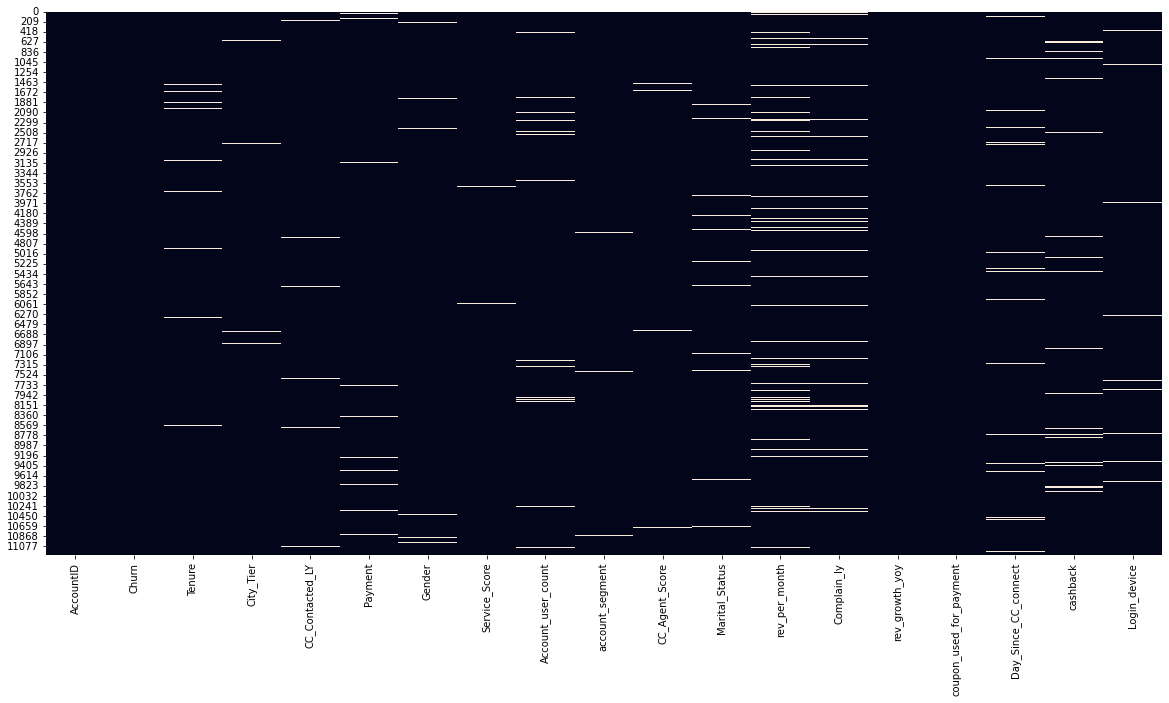

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [41]:
na_cols = df.isna().any()
print(na_cols)

AccountID                  False
Churn                      False
Tenure                      True
City_Tier                   True
CC_Contacted_LY             True
Payment                     True
Gender                      True
Service_Score               True
Account_user_count          True
account_segment             True
CC_Agent_Score              True
Marital_Status              True
rev_per_month               True
Complain_ly                 True
rev_growth_yoy              True
coupon_used_for_payment     True
Day_Since_CC_connect        True
cashback                    True
Login_device                True
dtype: bool


In [42]:
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in df.columns[1:]:
     if col in na_cols:
            if df[col].dtype != 'object':
                 df[col] =  df[col].fillna(df[col].mean()).round(0)

            

In [43]:
df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['account_segment'].fillna(df['account_segment'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)
df['Login_device'].fillna(df['Login_device'].mode()[0],inplace=True)


In [44]:
df.isna().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [45]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,160.0,Mobile
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,121.0,Mobile
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,196.0,Mobile
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,130.0,Mobile


In [46]:
Payment_split.head()

,No. of customers
Payment,
Cash on Delivery,1014
Credit Card,3511
Debit Card,4587
E wallet,1217
UPI,822


### Bivariate

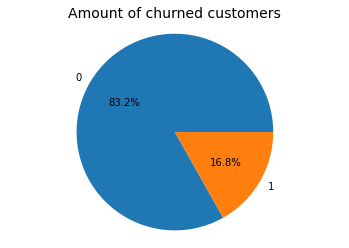

In [47]:
target = df["Churn"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

## Tenure vs Churn

In [48]:
# Some functions

churned = df[df['Churn'] == 1]
nonchurned = df[df['Churn'] == 0]
def plot_pie(column):
    target = df[column].value_counts()    
    fig1, ax1 = plt.subplots()    
    ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title("All customers", fontsize=14)
    plt.show()
    

def plot_compare(column, category_name):
    NChurned = len(churned[column].unique())
    NNonChurned = len(nonchurned[column].unique())
    
    ChurnedCounts = churned[column].value_counts().sort_index()
    NonChurnedCounts = nonchurned[column].value_counts().sort_index()
    
    indchurned = np.arange(NChurned)    # the x locations for the groups
    indnonchurned = np.arange(NNonChurned)    
    width = 1       # the width of the bars: can also be len(x) sequence
    
    figs, axs = plt.subplots(1,2, figsize=(12,5))
    
    axs[1].bar(indchurned, ChurnedCounts, width, color='#DD8452')
    axs[1].set_title('Churned ' + category_name, fontsize=20)
    axs[1].set_xticks(indchurned)
    axs[1].set_xticklabels(ChurnedCounts.index.tolist(), rotation=45)
    
    axs[0].bar(indnonchurned, NonChurnedCounts, width, color='b')
    axs[0].set_title('Non Churned ' + category_name, fontsize=20)
    axs[0].set_ylabel('Amount of People')
    axs[0].set_xticks(indnonchurned)
    axs[0].set_xticklabels(NonChurnedCounts.index.tolist(), rotation=45)
    
    
    plt.show()

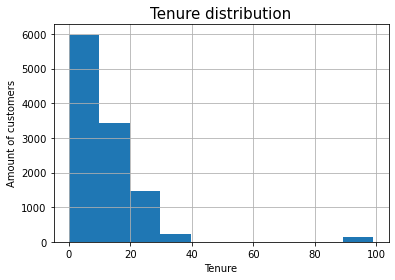

In [49]:
# Checking the overal distribution
df["Tenure"].hist()
plt.xlabel("Tenure")
plt.ylabel("Amount of customers")
plt.title("Tenure distribution", fontsize=15)
plt.show()

## Tenure vs Churn

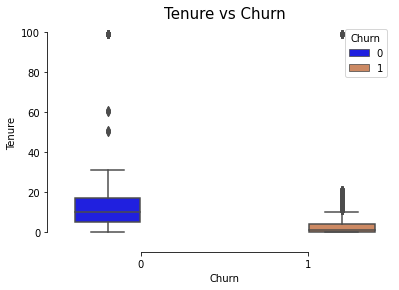

In [50]:
# Comparing the age distribution vs the target
sns.boxplot(x="Churn", y="Tenure",
            hue="Churn", palette=["b", "#DD8452"],
            data=df).set_title("Tenure vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

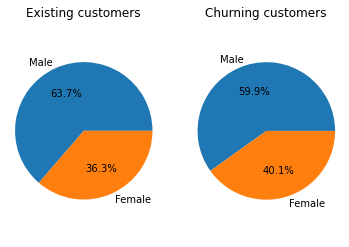

In [51]:
churnedtarget = churned["Gender"].value_counts()
nonchurnedtarget = nonchurned["Gender"].value_counts()

fig1, axs = plt.subplots(1, 2)

axs[0].pie(churnedtarget, labels=churnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[0].axis('equal')
axs[0].set_title('Existing customers')

axs[1].pie(nonchurnedtarget, labels=nonchurnedtarget.index, autopct='%1.1f%%', shadow=None)
axs[1].axis('equal')
axs[1].set_title('Churning customers')

plt.show()

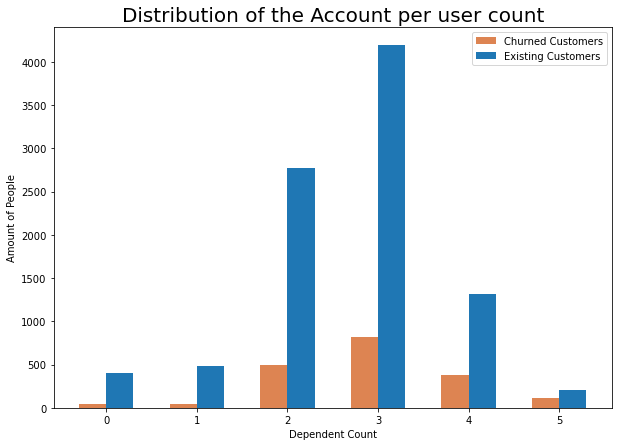

In [52]:
N = 6
ChurnedCounts = churned["Account_user_count"].value_counts().sort_index()
NonChurnedCounts = nonchurned["Account_user_count"].value_counts().sort_index()

ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence

figs, axs = plt.subplots(figsize=(10,7))

axs.bar(ind - width/2, ChurnedCounts, width, color = "#DD8452")
axs.bar(ind + width/2, NonChurnedCounts, width)

axs.set_xlabel('Dependent Count')
axs.set_ylabel('Amount of People')
axs.set_title('Distribution of the Account per user count', fontsize=20)
# axs.set_xticks(ind, ('0', '1', '2', '3', '4', '5'))
axs.legend(('Churned Customers','Existing Customers',))

plt.show()

In [53]:
nonchurned['Account_user_count'].describe()

count    9364.000000
mean        3.657732
std         0.999093
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: Account_user_count, dtype: float64

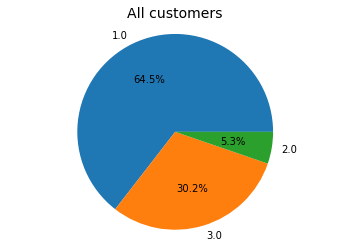

In [54]:
plot_pie("City_Tier")

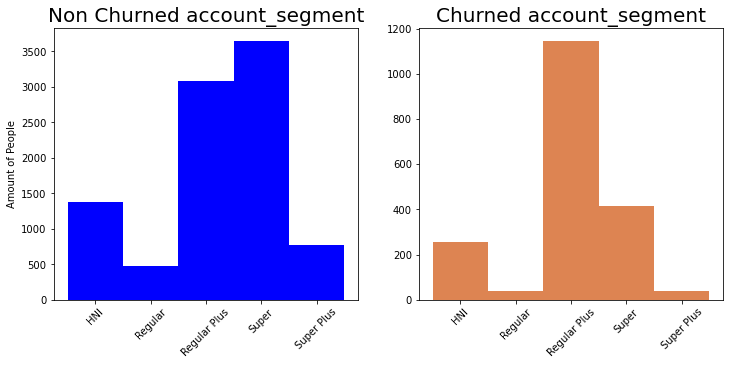

In [55]:
plot_compare("account_segment", "account_segment")

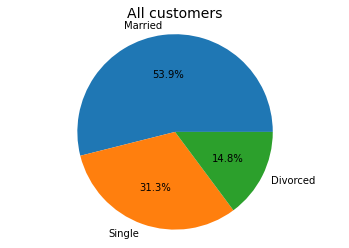

In [56]:
plot_pie("Marital_Status")

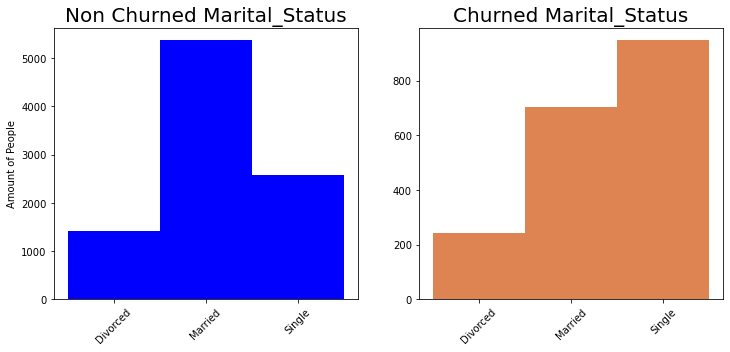

In [57]:
plot_compare("Marital_Status", "Marital_Status")

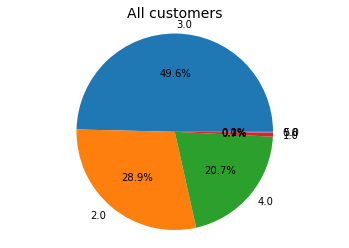

In [58]:
plot_pie("Service_Score")

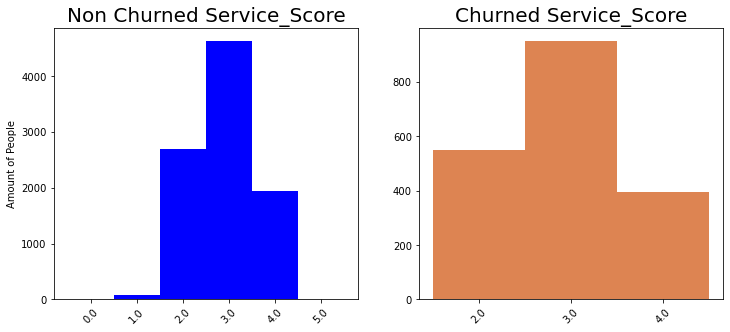

In [59]:
plot_compare("Service_Score", "Service_Score")

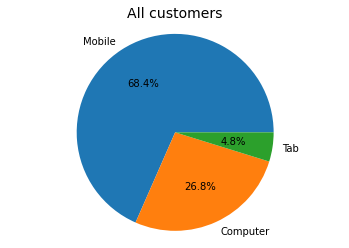

In [60]:
plot_pie("Login_device")

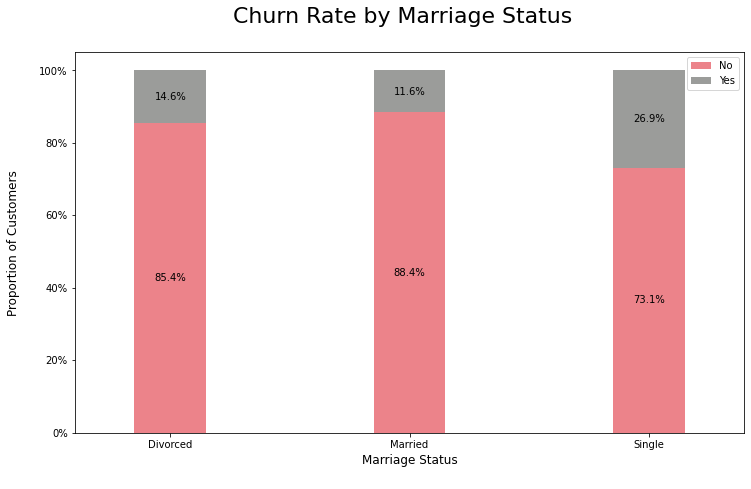

In [61]:

contract_churn =df.groupby(['Marital_Status','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Marriage Status\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Marriage Status  \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)


### Multivariate Analysis

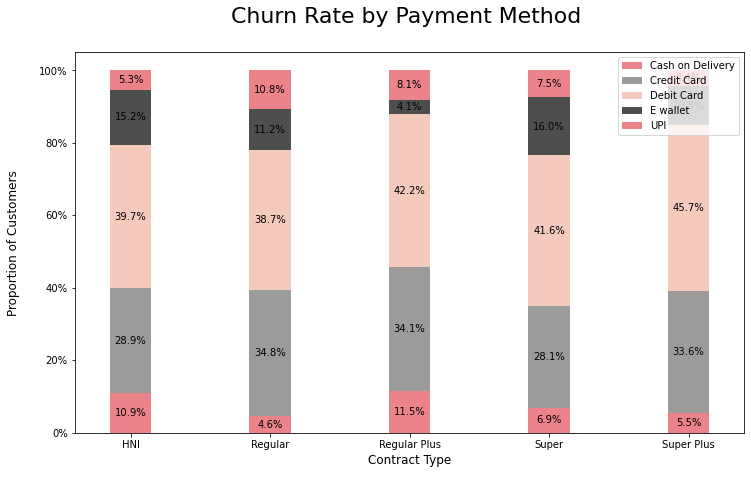

In [62]:

segment_churn = df.groupby(['account_segment','Payment']).size().unstack()
segment_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838b','#9b9c9a', '#f3cabc' , '#4d4f4c']
ax = (segment_churn.T*100.0 / segment_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)


In [63]:
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
value=df.columns
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 5:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
            le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
            print(le_name_mapping)
print('{} columns were label encoded.'.format(le_count))

{'Cash on Delivery': 0, 'Credit Card': 1, 'Debit Card': 2, 'E wallet': 3, 'UPI': 4}
{'Female': 0, 'Male': 1}
{'HNI': 0, 'Regular': 1, 'Regular Plus': 2, 'Super': 3, 'Super Plus': 4}
{'Divorced': 0, 'Married': 1, 'Single': 2}
{'Computer': 0, 'Mobile': 1, 'Tab': 2}
5 columns were label encoded.


In [64]:
dataset2 = df[['Payment','account_segment','Marital_Status','Login_device']]
dataset2.head()

,Payment,account_segment,Marital_Status,Login_device
0,2,3,2,1
1,4,2,2,1
2,2,2,2,1
3,2,3,2,1
4,1,2,2,1


In [65]:
correlations = df.corr()['Churn'].sort_values(ascending = False)
for i in correlations:
    print(i)

1.0
0.24635002235367898
0.14096321084790092
0.10516514573086404
0.10453363862808077
0.08352172721244512
0.07173463778259558
0.029114316015658146
0.021882320010373057
0.008935889933337287
0.0013968819680956462
-0.009541386555324641
-0.013870049488837405
-0.014838399408950705
-0.0316573039176082
-0.04340431767783608
-0.07933452564746937
-0.145355904311918
-0.23032682555327275


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

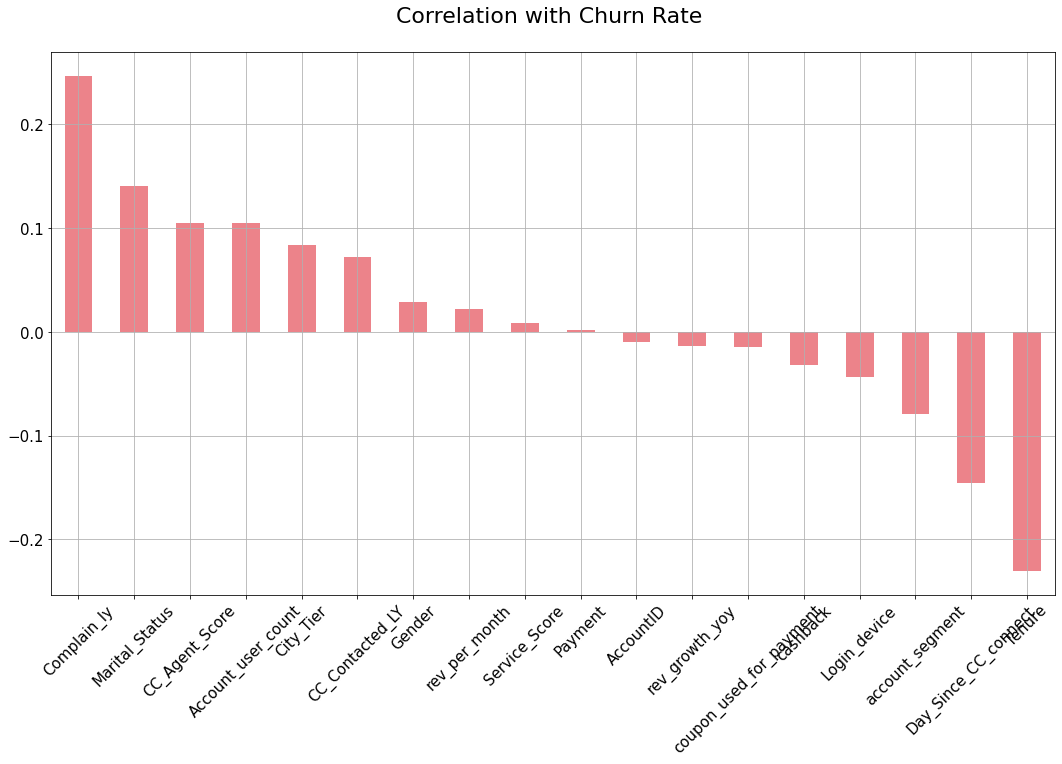

In [66]:
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [67]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
dataset2 = df[['Payment','account_segment','Marital_Status','Login_device']]
calc_vif(dataset2)

,variables,VIF
0,Payment,3.177436
1,account_segment,3.460622
2,Marital_Status,3.081602
3,Login_device,2.669243


### Outlier Detection and Treatment

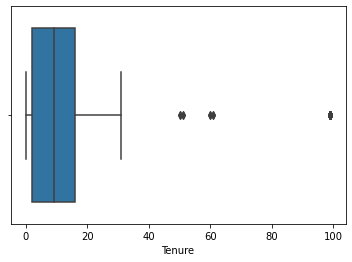

In [68]:
import seaborn as sns
#sns.boxplot(x=boston_df['DIS'])
sns.boxplot(x=df['Tenure']) 
# show plot
plt.show()

In [69]:
df.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.00000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,25629.50000,0.168384,11.024600,1.657371,17.868295,1.762167,0.604973,2.903375,3.704973,2.168739,3.065808,1.164476,6.337123,0.276288,16.193339,1.790675,4.644849,196.222114,0.779840
std,3250.62635,0.374223,12.754482,0.911100,8.813084,1.007789,0.488878,0.722476,1.004383,1.118655,1.372663,0.658583,11.484085,0.447181,3.757222,1.969291,3.638945,174.864197,0.517156
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,1.000000,0.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,0.000000,13.000000,1.000000,2.000000,148.000000,0.000000
50%,25629.50000,0.000000,9.000000,1.000000,16.000000,2.000000,1.000000,3.000000,4.000000,2.000000,3.000000,1.000000,5.000000,0.000000,15.000000,1.000000,4.000000,167.000000,1.000000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,2.000000,1.000000,3.000000,4.000000,3.000000,4.000000,2.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.000000,1.000000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,4.000000,1.000000,5.000000,6.000000,4.000000,5.000000,2.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000,2.000000


In [70]:
data_mean, data_std = np.mean(df['Tenure']), np.std(df['Tenure'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [71]:
outliers = [x for x in df['Tenure'] if x < lower or x > upper]

In [72]:
len(outliers)

139

In [73]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

       AccountID     Churn    Tenure  City_Tier  CC_Contacted_LY   Payment  \
0       1.731897  2.222345  0.550780   1.473700         1.346727  0.236005   
1       1.731589  2.222345  0.864409   0.721546         1.119782  2.220635   
2       1.731282  2.222345  0.864409   0.721546         1.376617  0.236005   
3       1.730974  2.222345  0.864409   1.473700         0.325473  0.236005   
4       1.730666  2.222345  0.864409   0.721546         0.665891  0.756310   
...          ...       ...       ...        ...              ...       ...   
11255   1.730666  0.449975  0.080336   0.721546         1.830508  0.756310   
11256   1.730974  0.449975  0.154886   0.721546         0.128418  0.756310   
11257   1.731282  0.449975  0.786002   0.721546         0.438946  0.236005   
11258   1.731589  0.449975  0.938959   1.473700         0.779364  0.756310   
11259   1.731897  0.449975  0.237151   0.721546         0.468836  0.756310   

         Gender  Service_Score  Account_user_count  account_seg

In [74]:
threshold = 3
print(np.where(z > 3))

(array([   10,    17,    21,    31,    54,    69,    69,    87,    93,
         119,   126,   150,   189,   191,   201,   205,   226,   234,
         259,   261,   270,   276,   300,   302,   326,   338,   341,
         381,   383,   387,   389,   410,   426,   436,   443,   489,
         491,   496,   528,   561,   561,   566,   576,   584,   595,
         605,   627,   650,   653,   736,   738,   749,   750,   759,
         761,   788,   796,   801,   801,   810,   812,   814,   819,
         824,   851,   853,   872,   891,   928,   929,   950,   953,
         953,   961,   968,  1011,  1036,  1139,  1148,  1176,  1186,
        1189,  1223,  1223,  1250,  1279,  1302,  1309,  1373,  1375,
        1464,  1468,  1481,  1490,  1511,  1513,  1520,  1523,  1526,
        1527,  1543,  1551,  1552,  1572,  1587,  1610,  1664,  1679,
        1680,  1729,  1731,  1731,  1754,  1763,  1770,  1776,  1787,
        1800,  1810,  1842,  1849,  1906,  1950,  1961,  1998,  2018,
        2026,  2031

In [75]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AccountID                  5629.5
Churn                         0.0
Tenure                       14.0
City_Tier                     2.0
CC_Contacted_LY              12.0
Payment                       1.0
Gender                        1.0
Service_Score                 1.0
Account_user_count            1.0
account_segment               1.0
CC_Agent_Score                2.0
Marital_Status                1.0
rev_per_month                 4.0
Complain_ly                   1.0
rev_growth_yoy                6.0
coupon_used_for_payment       1.0
Day_Since_CC_connect          5.0
cashback                     49.0
Login_device                  1.0
dtype: float64


### Outlier Removal

In [76]:
def remove_outliers(x):

    ## storing names of columns in Column_Names
    Column_Names=x.columns

    ## importing matplotlib and seaborn for visualisation of outliers
    import matplotlib.pyplot as plt
    import seaborn as sns   

    ## iterating through Column_Names using try and except for distinguishing between numerical and categorical columns
    for j in Column_Names:
        try:
            print('Before Removing Outliers')

            ##visualisation of outliers
            a = sns.boxplot(data=x,x=x[j])
            plt.tight_layout() 
            plt.show() 

            xy=x[j]    
            mydata=pd.DataFrame()

            updated=[]
            Q1,Q3=np.percentile(xy,[25,75])
            IQR=Q3-Q1
            minimum=Q1-1.5*IQR
            maximum=Q3+1.5*IQR

            ## using the maximum and minimum values obtained from quartiles and inter-quartile range
            ## any outliers greater than maximum are updated to be equal to maximum
            ## any outliers lesser than minimum are updated to be equal to minimum
            ## here, no outliers have been removed to prevent loss of data

            for i in xy:
                if(i>maximum):
                    i=maximum
                    updated.append(i)
                elif(i<minimum):
                    i=minimum
                    updated.append(i)
                else:
                    updated.append(i)

            x[j]=updated
            print('After Removing Outliers')

            ## visualising after removing outliers
            b= sns.boxplot(data=x,x=x[j])
            plt.tight_layout() 
            plt.show()

        except:
            continue

    return x

In [77]:
df1=df.copy()
df1=df1.drop('Churn', axis=1)

Before Removing Outliers


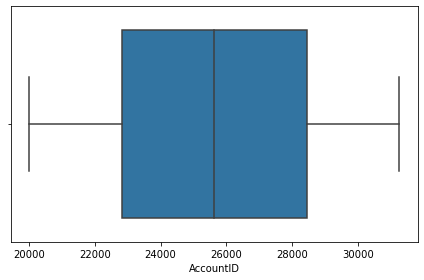

After Removing Outliers


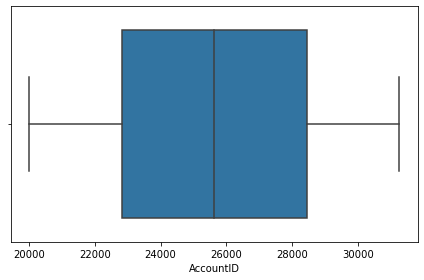

Before Removing Outliers


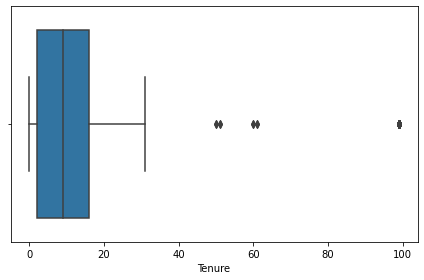

After Removing Outliers


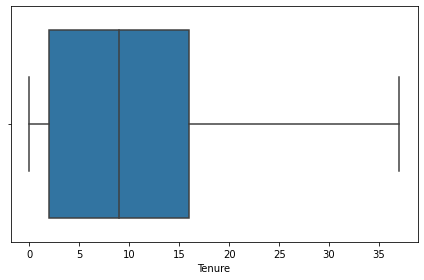

Before Removing Outliers


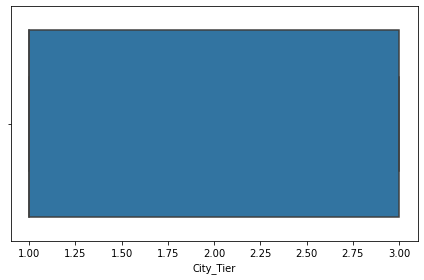

After Removing Outliers


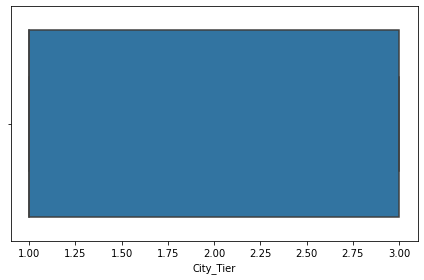

Before Removing Outliers


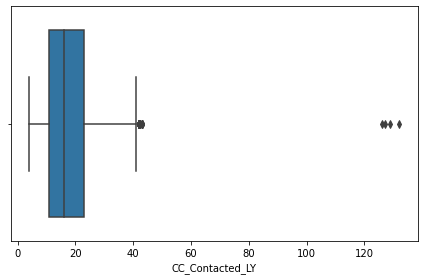

After Removing Outliers


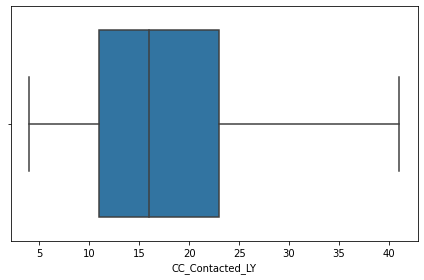

Before Removing Outliers


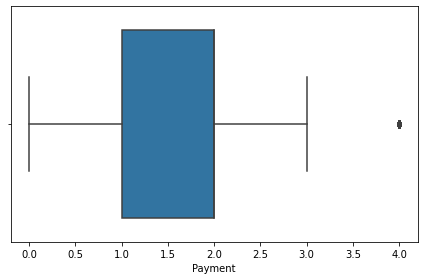

After Removing Outliers


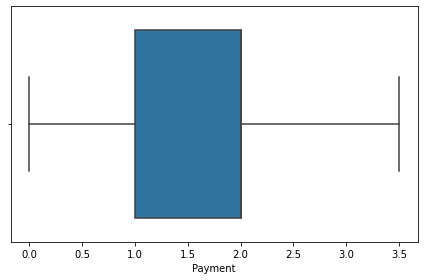

Before Removing Outliers


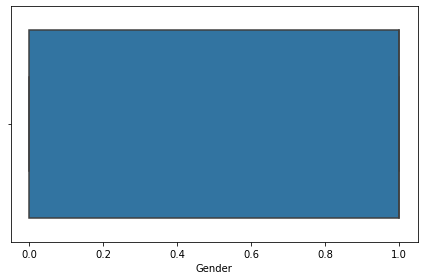

After Removing Outliers


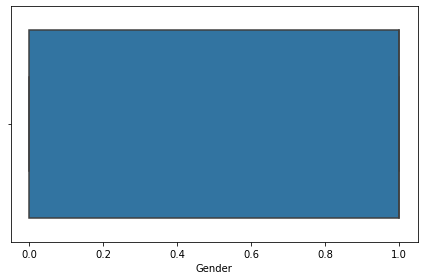

Before Removing Outliers


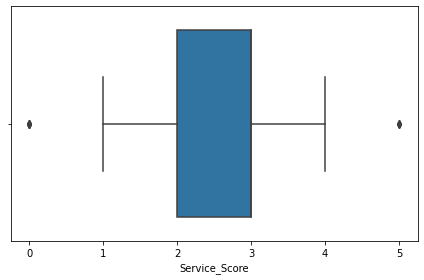

After Removing Outliers


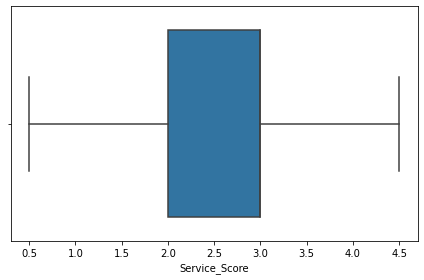

Before Removing Outliers


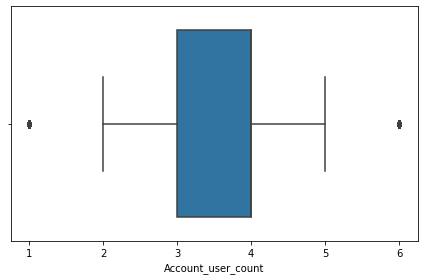

After Removing Outliers


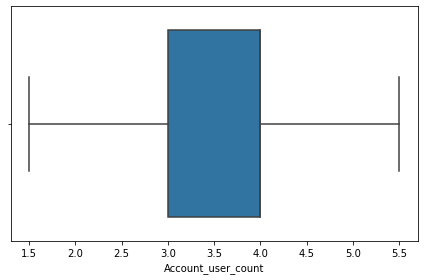

Before Removing Outliers


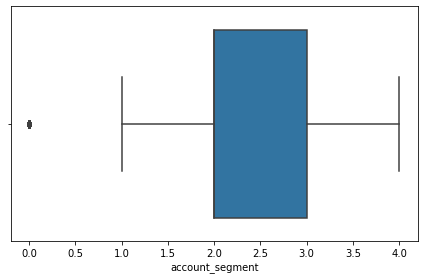

After Removing Outliers


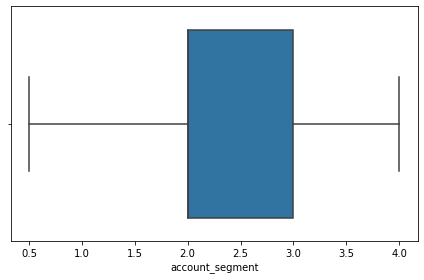

Before Removing Outliers


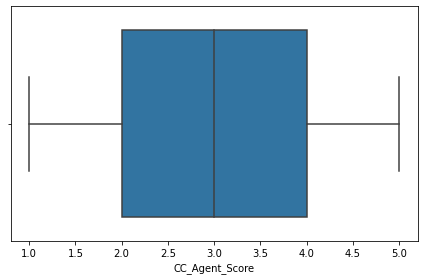

After Removing Outliers


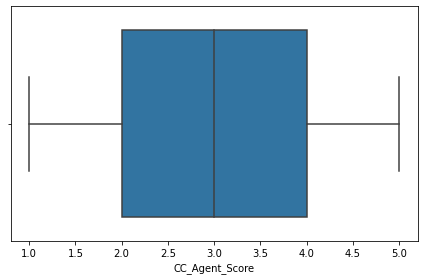

Before Removing Outliers


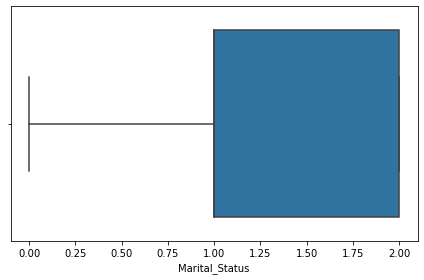

After Removing Outliers


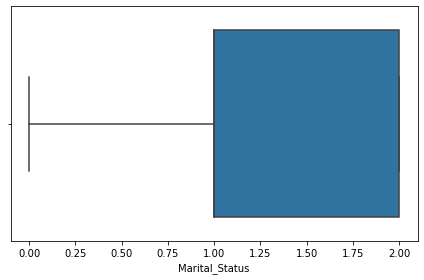

Before Removing Outliers


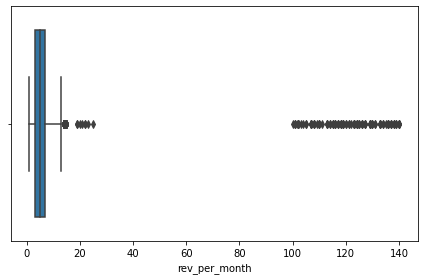

After Removing Outliers


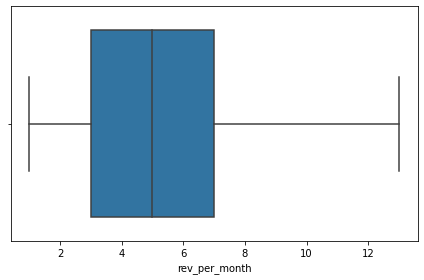

Before Removing Outliers


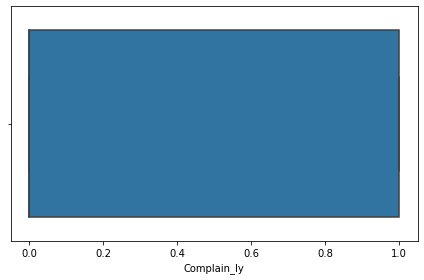

After Removing Outliers


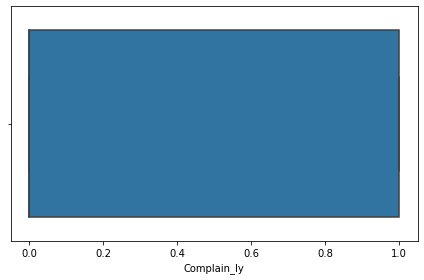

Before Removing Outliers


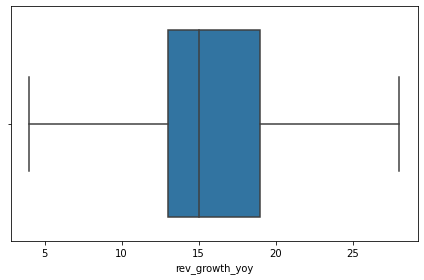

After Removing Outliers


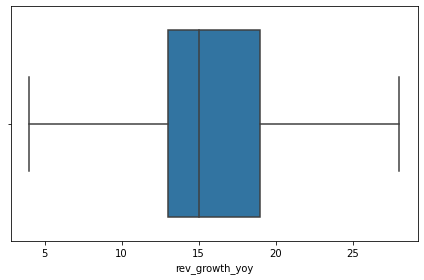

Before Removing Outliers


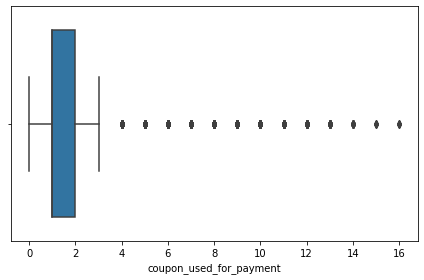

After Removing Outliers


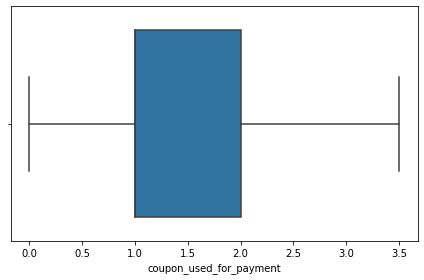

Before Removing Outliers


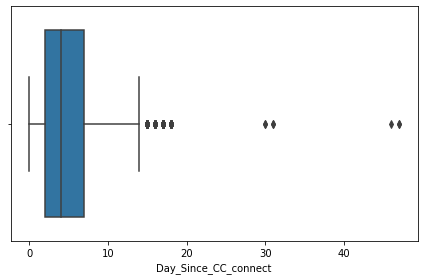

After Removing Outliers


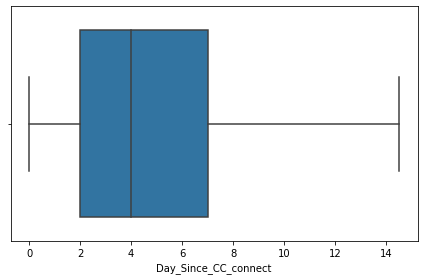

Before Removing Outliers


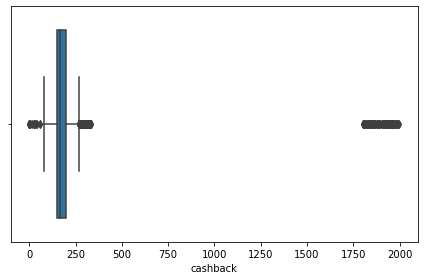

After Removing Outliers


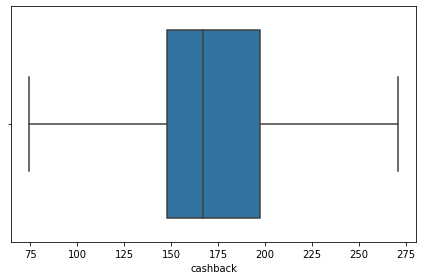

Before Removing Outliers


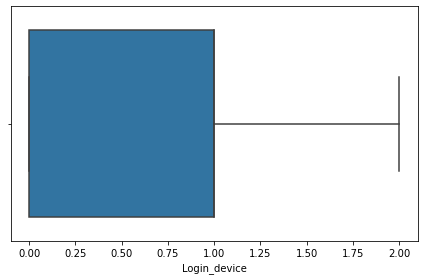

After Removing Outliers


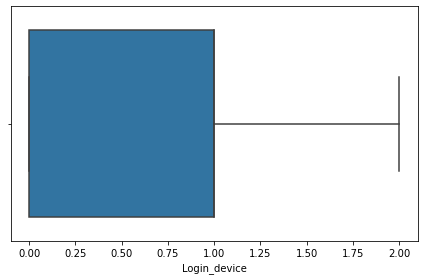

In [78]:
df1=remove_outliers(df1)

In [79]:
df.shape

(11260, 19)

### Multivariate

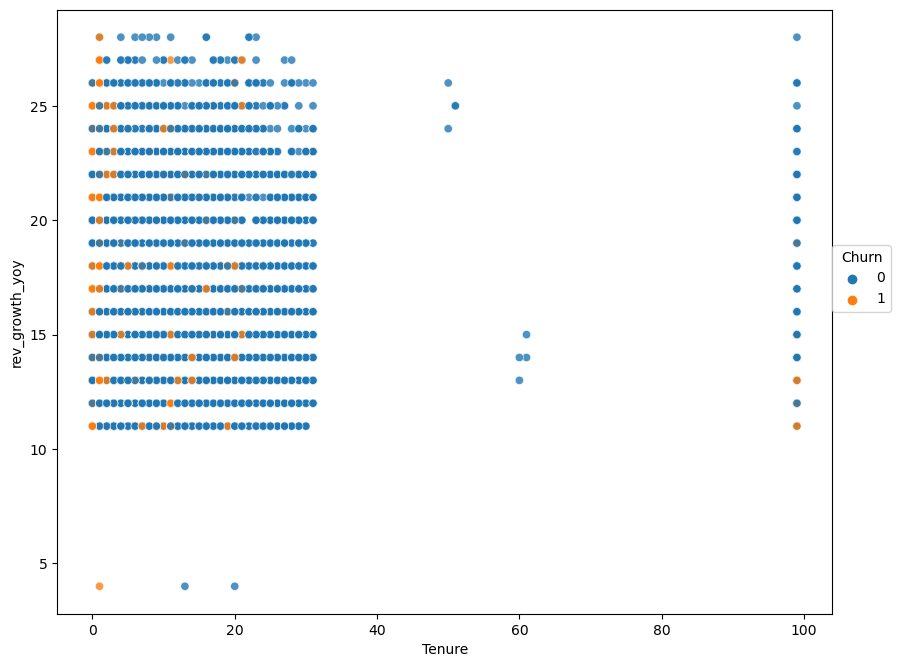

In [80]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(data=df,x='Tenure',y='rev_growth_yoy',hue='Churn',alpha=0.8)
plt.legend(loc=(1,0.5),title = "Churn")

In [81]:
no_churn = df.groupby(['Churn','Tenure']).count().transpose()[0]
yes_churn = df.groupby(['Churn','Tenure']).count().transpose()[1]

<AxesSubplot:xlabel='Tenure', ylabel='Rate Customers Choose to Churn(%)'>

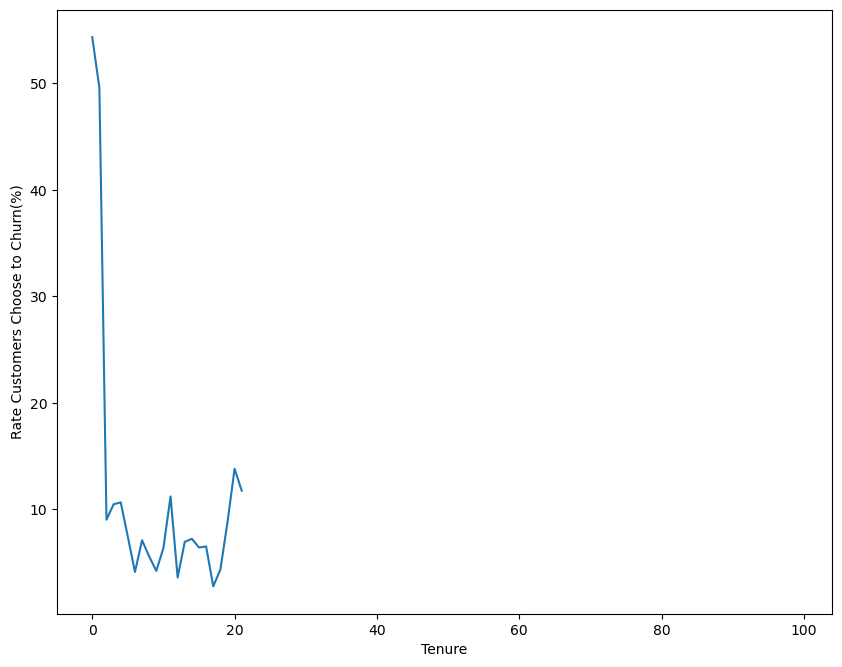

In [82]:
churn_rates_Yes = 100 * yes_churn/(no_churn+yes_churn)
plt.figure(figsize=(10,8),dpi=100)
plt.ylabel('Rate Customers Choose to Churn(%)')
churn_rates_Yes.iloc[0].plot()

In [83]:
df_corr=dataset2.corr()

In [84]:
df_corr.head()

,Payment,account_segment,Marital_Status,Login_device
Payment,1.000000,0.037334,-0.021482,0.006205
account_segment,0.037334,1.000000,-0.002472,-0.020833
Marital_Status,-0.021482,-0.002472,1.000000,-0.018845
Login_device,0.006205,-0.020833,-0.018845,1.000000


In [85]:
df['Tenure'].describe()

count    11260.000000
mean        11.024600
std         12.754482
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64

In [86]:
def yearly_tenure(tenure):
    if tenure <= 12:
        return 1
    elif tenure >12 and tenure <=24:
        return 2
    elif tenure >24 and tenure <=36:
        return 3
    elif tenure >36 and tenure <=48:
        return 4
    elif tenure >48 and tenure <=60:
        return 5
    elif tenure > 60 and tenure <=72:
        return 6

In [87]:
df['yearly_tenure'] = df['Tenure'].apply(yearly_tenure)

In [88]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,yearly_tenure
0,20000,1,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,160.0,1,1.0
1,20001,1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,121.0,1,1.0
2,20002,1,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,196.0,1,1.0
3,20003,1,0.0,3.0,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0.0,3.0,134.0,1,1.0
4,20004,1,0.0,1.0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1.0,3.0,130.0,1,1.0


### Bivariate

Text(0.5, 0, 'Tenure in years')

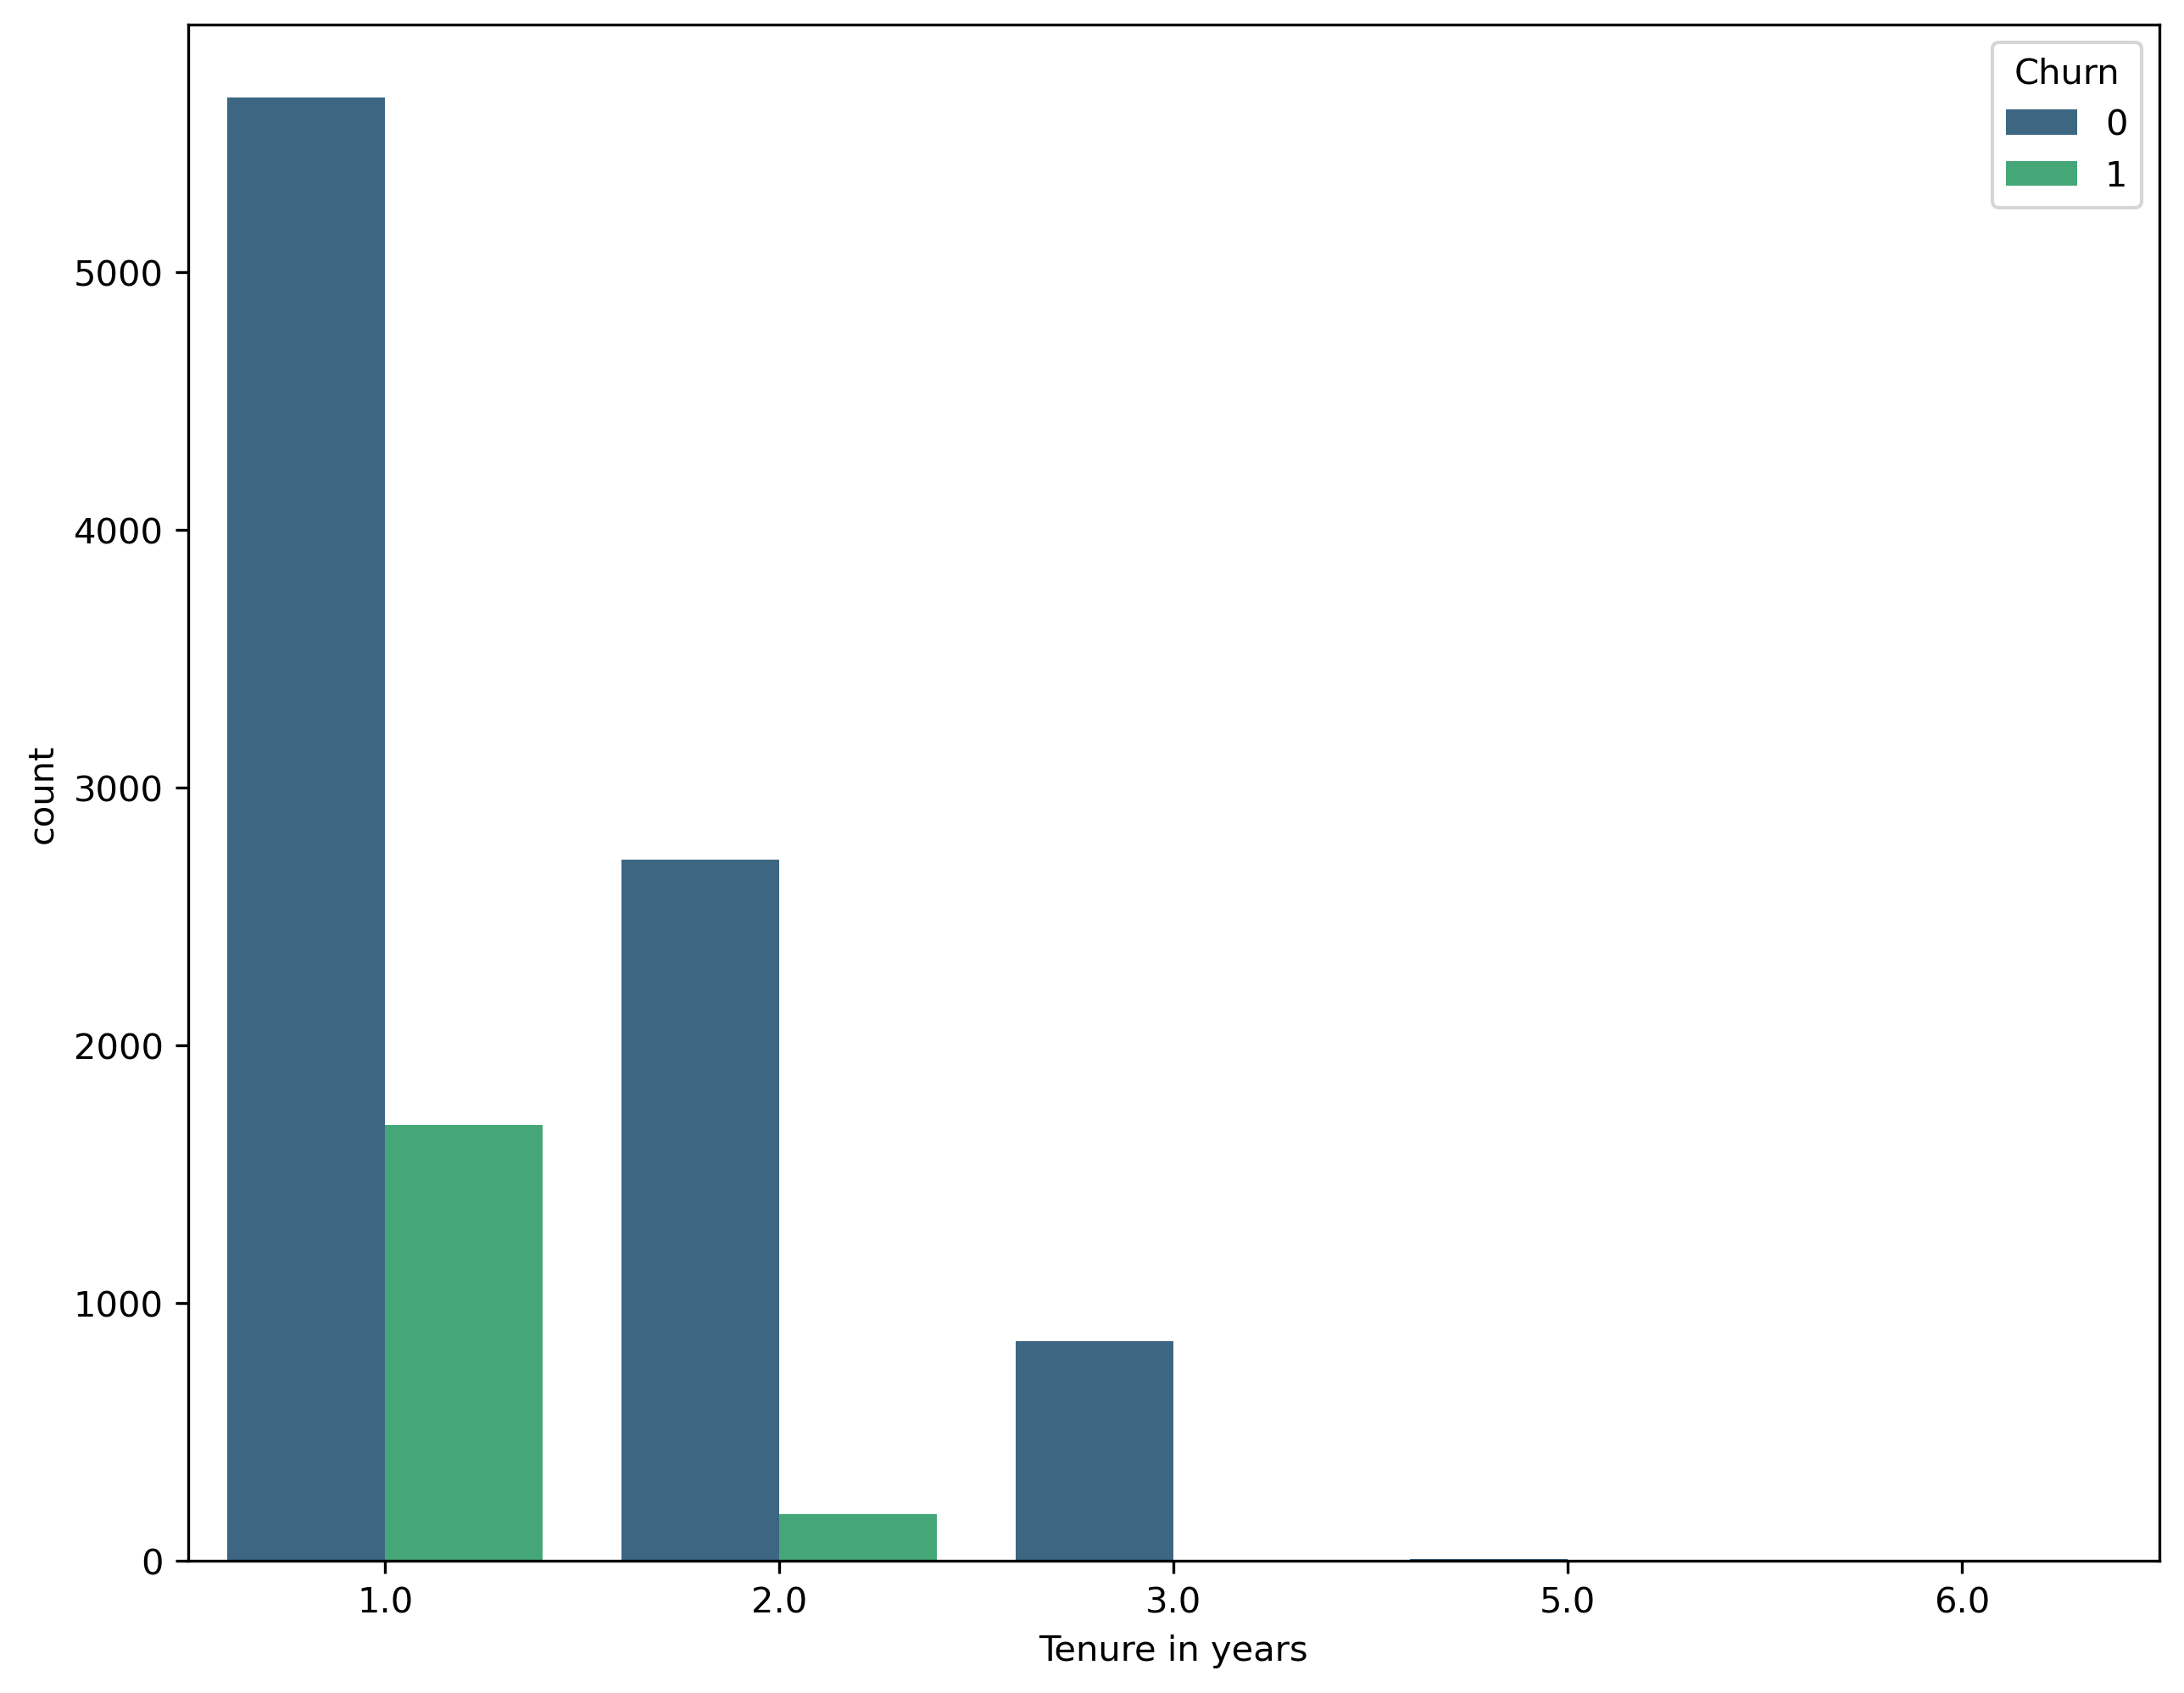

In [89]:
plt.figure(figsize=(10,8),dpi=300)
sns.countplot(data=df,x='yearly_tenure',hue='Churn',palette='viridis')
plt.xlabel('Tenure in years')

In [90]:
df1['rev_per_month'].describe()

count    11260.000000
mean         5.321048
std          2.884834
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         13.000000
Name: rev_per_month, dtype: float64

Text(0.5, 0, 'Type of Plan')

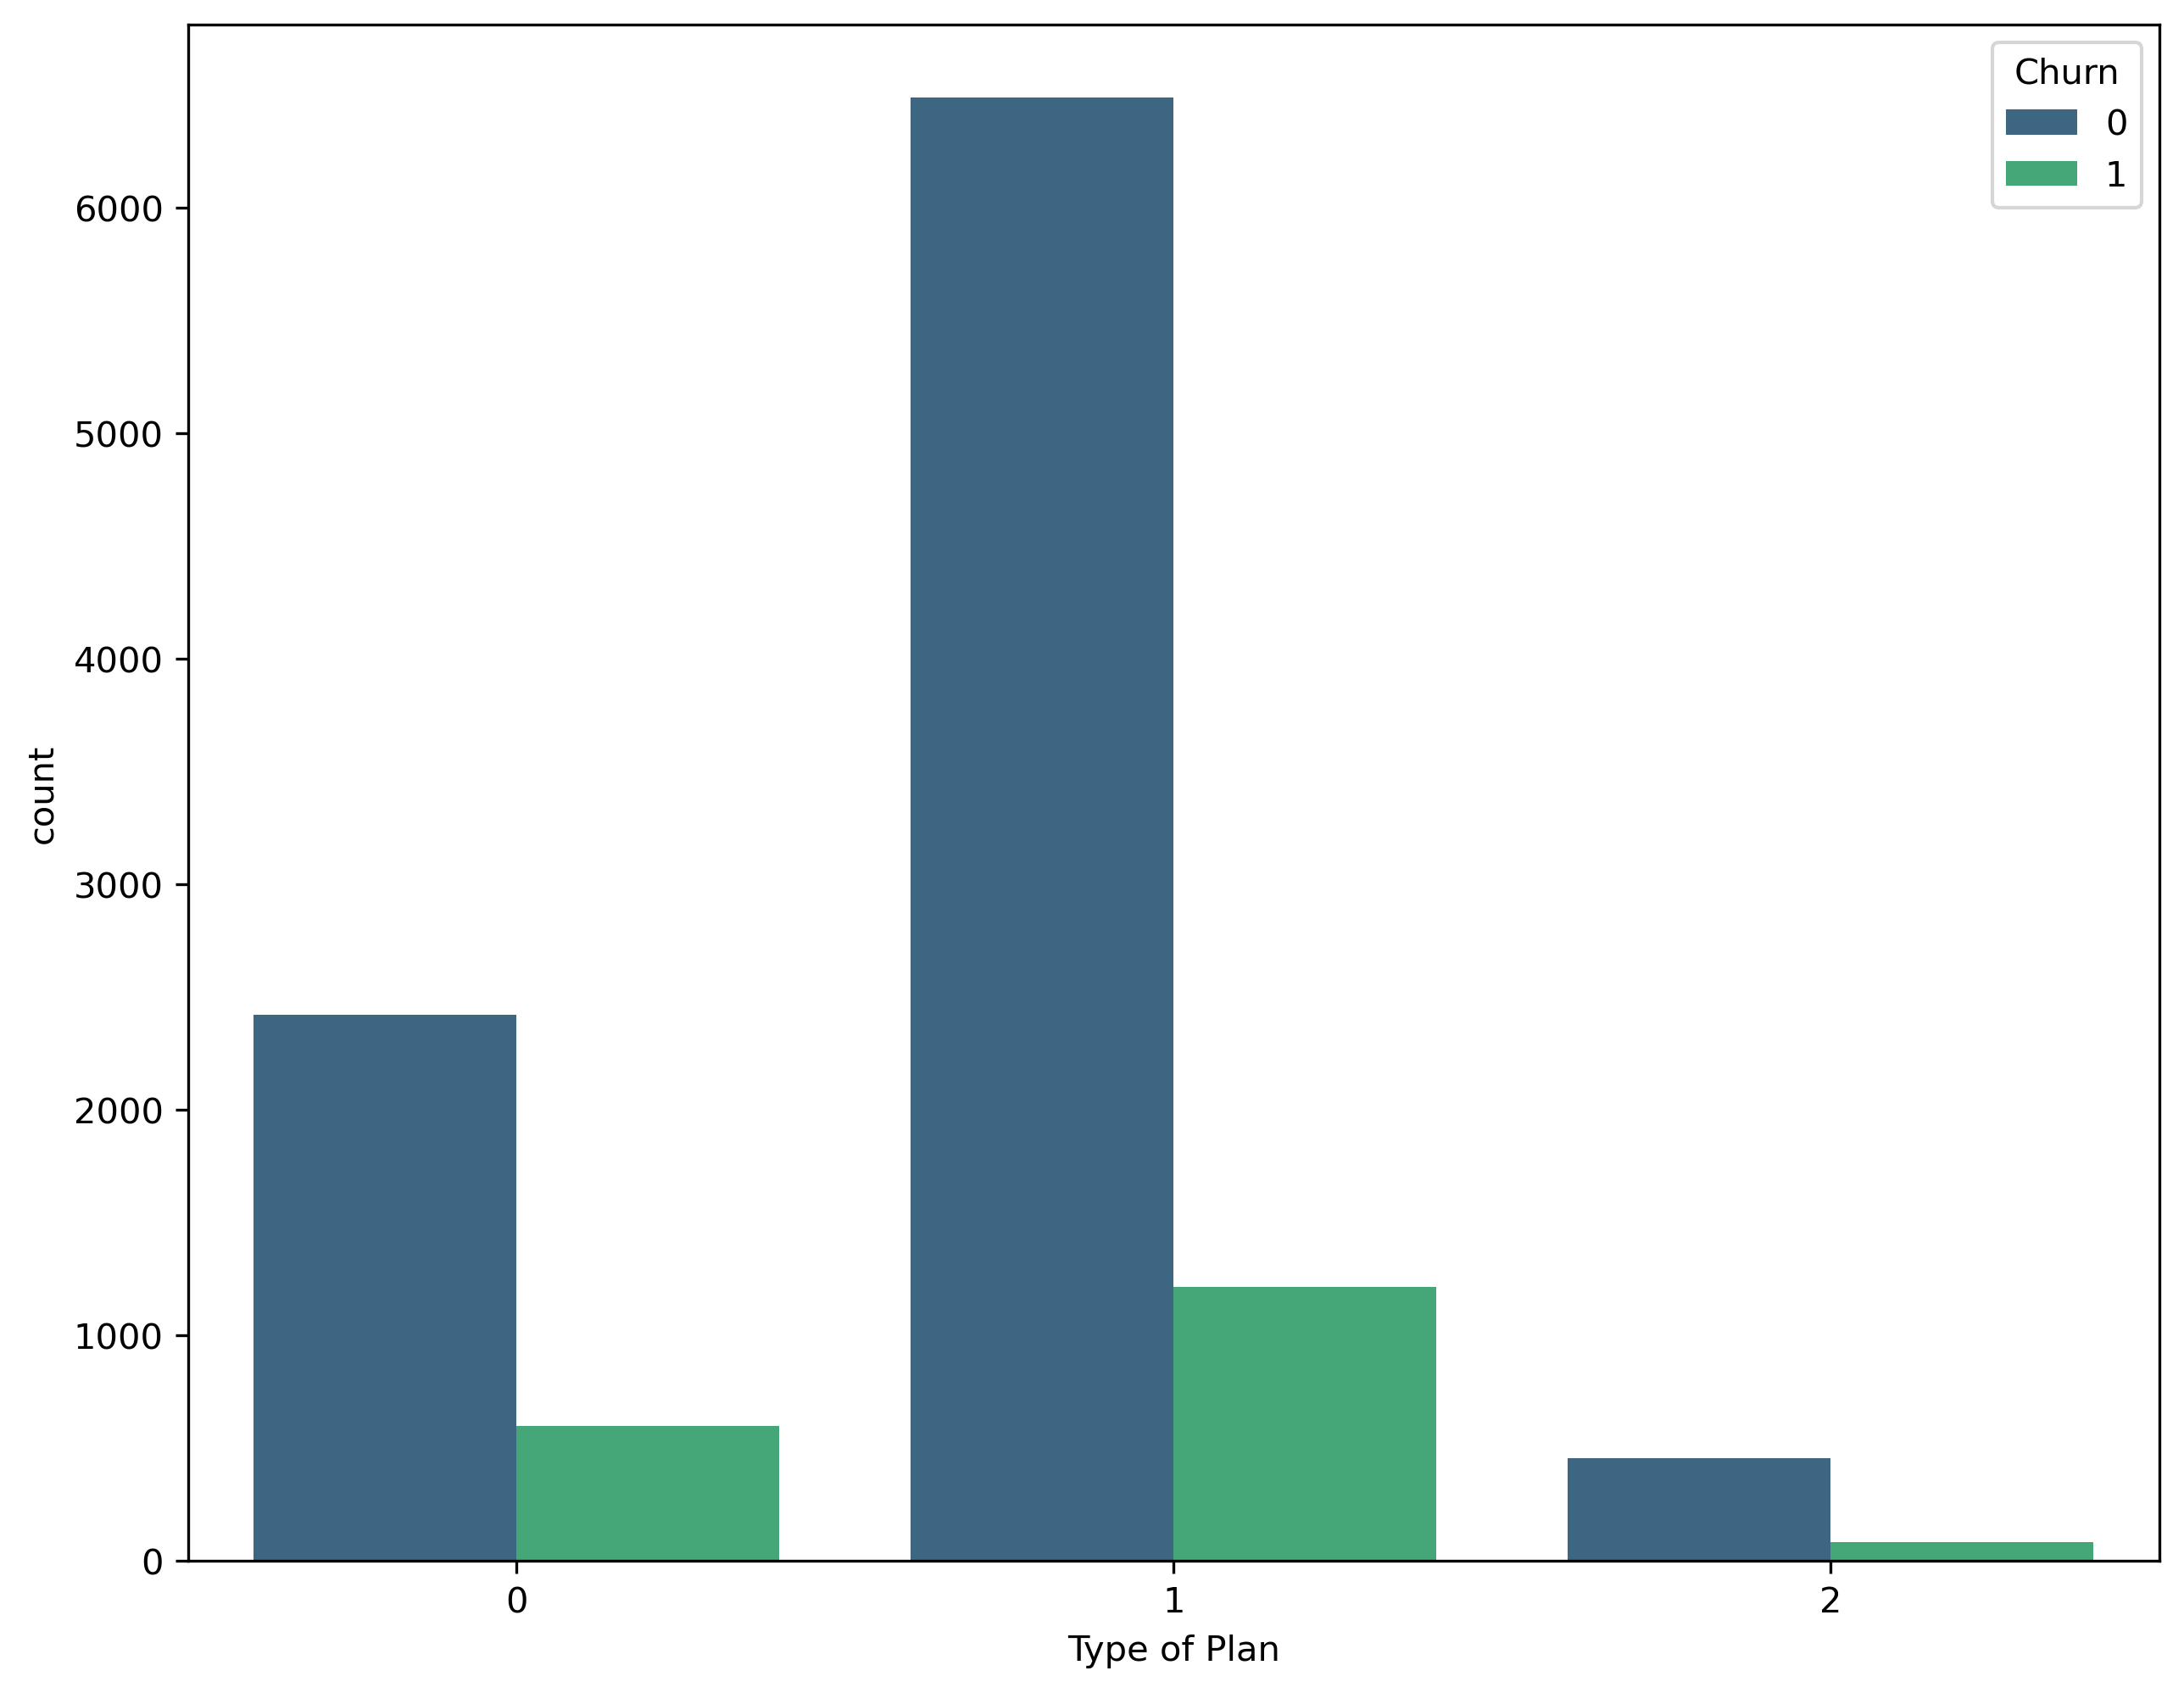

In [91]:
plt.figure(figsize=(10,8),dpi=300)
sns.countplot(data=df,x='Login_device',hue='Churn',palette='viridis')
plt.xlabel('Type of Plan')

In [92]:
X= pd.get_dummies(df1.drop(['AccountID'],axis=1),drop_first=True)
y= df['Churn']

### Handling the Imbalancing in the data using SMOTE

In [93]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [94]:
X.shape

(18728, 17)

### Train Test Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Scaling

In [96]:
scaler= StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [97]:
knn_model = KNeighborsClassifier()
param_grid= {'n_neighbors':range(1,50), 'metric': ['minkowski','manhattan','euclidean']}
knn_grid_model = GridSearchCV(knn_model,param_grid)
knn_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)})

In [98]:
knn_predictions = knn_grid_model.predict(scaled_X_test)

In [99]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2368
           1       0.99      1.00      0.99      2314

    accuracy                           0.99      4682
   macro avg       0.99      0.99      0.99      4682
weighted avg       0.99      0.99      0.99      4682



In [100]:
acc = accuracy_score(y_test, knn_predictions)
print(acc)

0.9933788979068774


C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


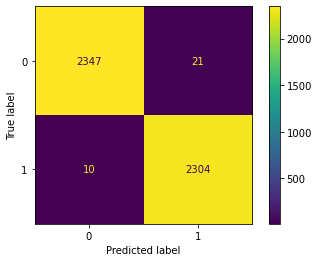

In [101]:
plot_confusion_matrix(knn_grid_model,scaled_X_test,y_test)

In [102]:
svc = SVC()
param_grid_svm={'C': [0.1,0.5,1,2,10],'gamma':['scale','auto'],'kernel': ['linear','rbf','poly','sigmoid']}

In [103]:
svc_grid_model= GridSearchCV(svc,param_grid_svm,cv=5)

In [104]:
svc_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [105]:
svc_predictions = svc_grid_model.predict(scaled_X_test)

In [106]:
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2368
           1       0.97      0.99      0.98      2314

    accuracy                           0.98      4682
   macro avg       0.98      0.98      0.98      4682
weighted avg       0.98      0.98      0.98      4682



C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


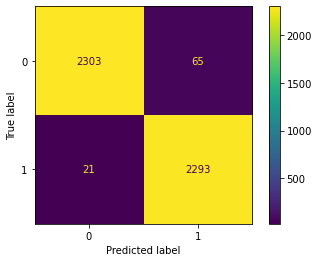

In [107]:
plot_confusion_matrix(svc_grid_model,scaled_X_test,y_test)

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel= GradientBoostingClassifier()
gb_param_grid= {'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}

In [109]:
grid_gb= GridSearchCV(gbmodel,gb_param_grid,cv=5)

In [110]:
grid_gb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [111]:
gb_predictions = grid_gb.predict(X_test)
print(classification_report(y_test,gb_predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2368
           1       0.98      0.97      0.97      2314

    accuracy                           0.97      4682
   macro avg       0.97      0.97      0.97      4682
weighted avg       0.97      0.97      0.97      4682



C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


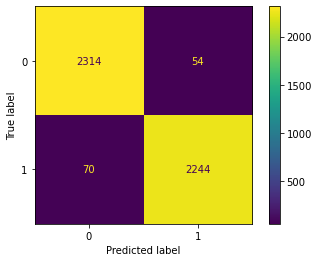

In [112]:
plot_confusion_matrix(grid_gb,X_test,y_test)

In [113]:
from sklearn.ensemble import AdaBoostClassifier
Ada_model= AdaBoostClassifier()
param_grid_Ada= {'n_estimators':range(1,50)}

In [114]:
error_rates= []
for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    
    predict= model.predict(X_test)
    
    error= 1- accuracy_score(y_test,predict)
    
    error_rates.append(error)

AdaBoostClassifier(n_estimators=20)

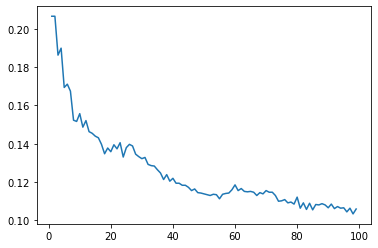

In [115]:
plt.plot(range(1,100),error_rates)
Ada_model_final = AdaBoostClassifier(n_estimators=20)
Ada_model_final.fit(X_train,y_train)

<AxesSubplot:ylabel='Importance'>

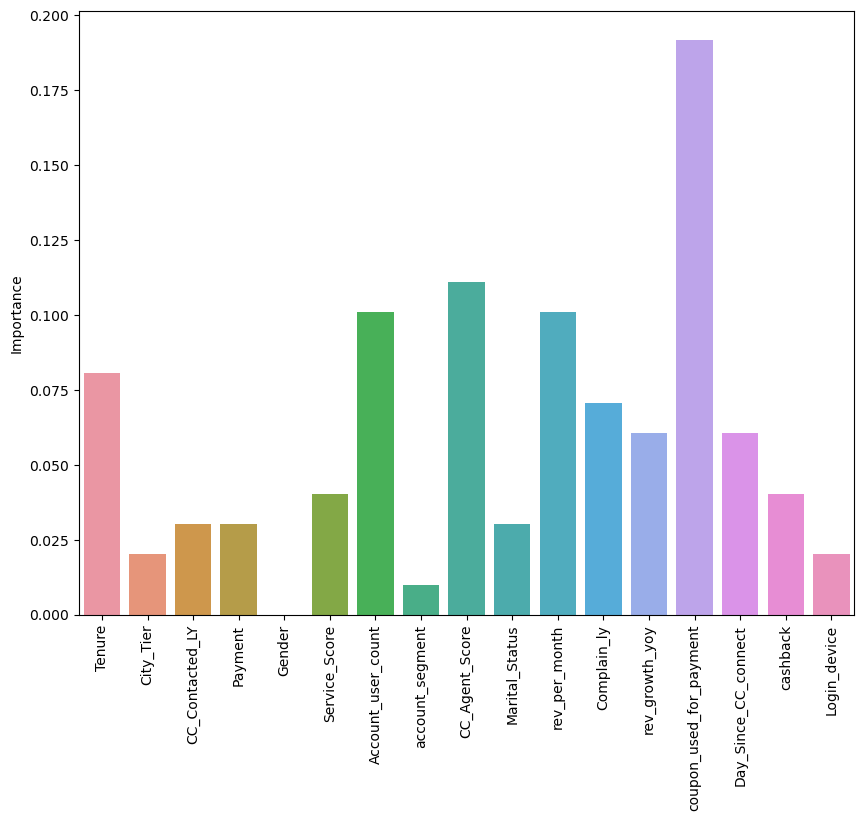

In [116]:
features= pd.DataFrame(index= X.columns,data=model.feature_importances_,columns=['Importance'])
plt.figure(figsize=(10,8),dpi=100)
plt.xticks(rotation=90)
sns.barplot(data=features,x=features.index,y='Importance')

In [117]:
X_test.shape

(4682, 17)

In [118]:
from sklearn.ensemble import RandomForestRegressor
for_reg = RandomForestRegressor(random_state = 42)
for_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [119]:
predict = for_reg.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [121]:
accuracy_score(predict.round(),y_test)

0.9807774455360957

In [122]:
mse = mean_squared_error(predict.round(),y_test)

In [123]:
rmse = np.sqrt(mse)
rmse

0.13864542712943803

In [124]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [125]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [126]:
#Logistic Regression model building
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver = 'sag',random_state=100,multi_class='ovr')
logmodel.fit(X_train,y_train)

C:\Users\vedpr\.conda\envs\geekycodes\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(multi_class='ovr', random_state=100, solver='sag')

In [127]:
#Training Model Score
logmodel.score(X_train,y_train)

0.8044995016374769

In [128]:
#Testing Model Score
logmodel.score(X_test,y_test)

0.7968816744980778

In [129]:
logmodel.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [130]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,logmodel.predict(X_test))
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
TP = cm[1][1]
print(cm)
print('The model testing accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[1823  545]
 [ 406 1908]]
The model testing accuracy = 0.7968816744980778


In [131]:
y_pred_proba=clf.predict_proba(X_test)[::,1]

In [132]:
pre,recal,_=metrics.roc_curve(y_test,y_pred_proba)

In [133]:
rocaucscore=metrics.roc_auc_score(y_test,y_pred_proba)
print(rocaucscore)

0.9288817771963841


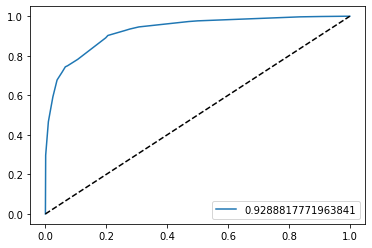

In [134]:
plt.plot(pre,recal,label=rocaucscore)
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)